In [32]:
import glob, pandas as pd
data = [{
  'date': pd.to_datetime(filename.split(' ')[0].lstrip('speeches/').lstrip("\\")),
  'speaker': filename.rstrip('.txt').split(' ', 1)[1],
  'text': open(filename, 'r').readline().decode('cp1252')
} for filename in glob.glob('speeches/*.txt')]
speeches = pd.DataFrame(data)
speeches = speeches.set_index(['speaker', 'date'])
speeches.head()

text
speaker           date                                                                  
George Washington 1789-04-30 00:00:00  Fellow Citizens of the Senate and the House of...
                  1789-10-03 00:00:00  Whereas it is the duty of all Nations to ackno...
                  1790-01-08 00:00:00  Fellow Citizens of the Senate and House of Rep...
                  1790-12-08 00:00:00  Fellow citizens of the Senate and House of Rep...
                  1790-12-29 00:00:00  I the President of the United States by my own...

# Task A
Choose a reasonable number of topics for this corpus. One way to think about topics is to consider the number of issues that may have been important in the past as well as those that may have come up over the centuries. Provide a brief explanation of how you chose this number.

In [33]:
N_TOPICS = 100

# Task B
Now perform a topic modeling exercise with LDA. Show the word distributions for each topic as well as topic distributions for each speech. Do you see any shifts over time? Explain.

In [34]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV #if needed, not sure if LDA prone to overfitting
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
  CountVectorizer(stop_words='english'),
  LDA(n_components=N_TOPICS, learning_method='batch', n_jobs=-1, max_iter=10, random_state=42)
).fit(speeches.text)

KeyboardInterrupt: 

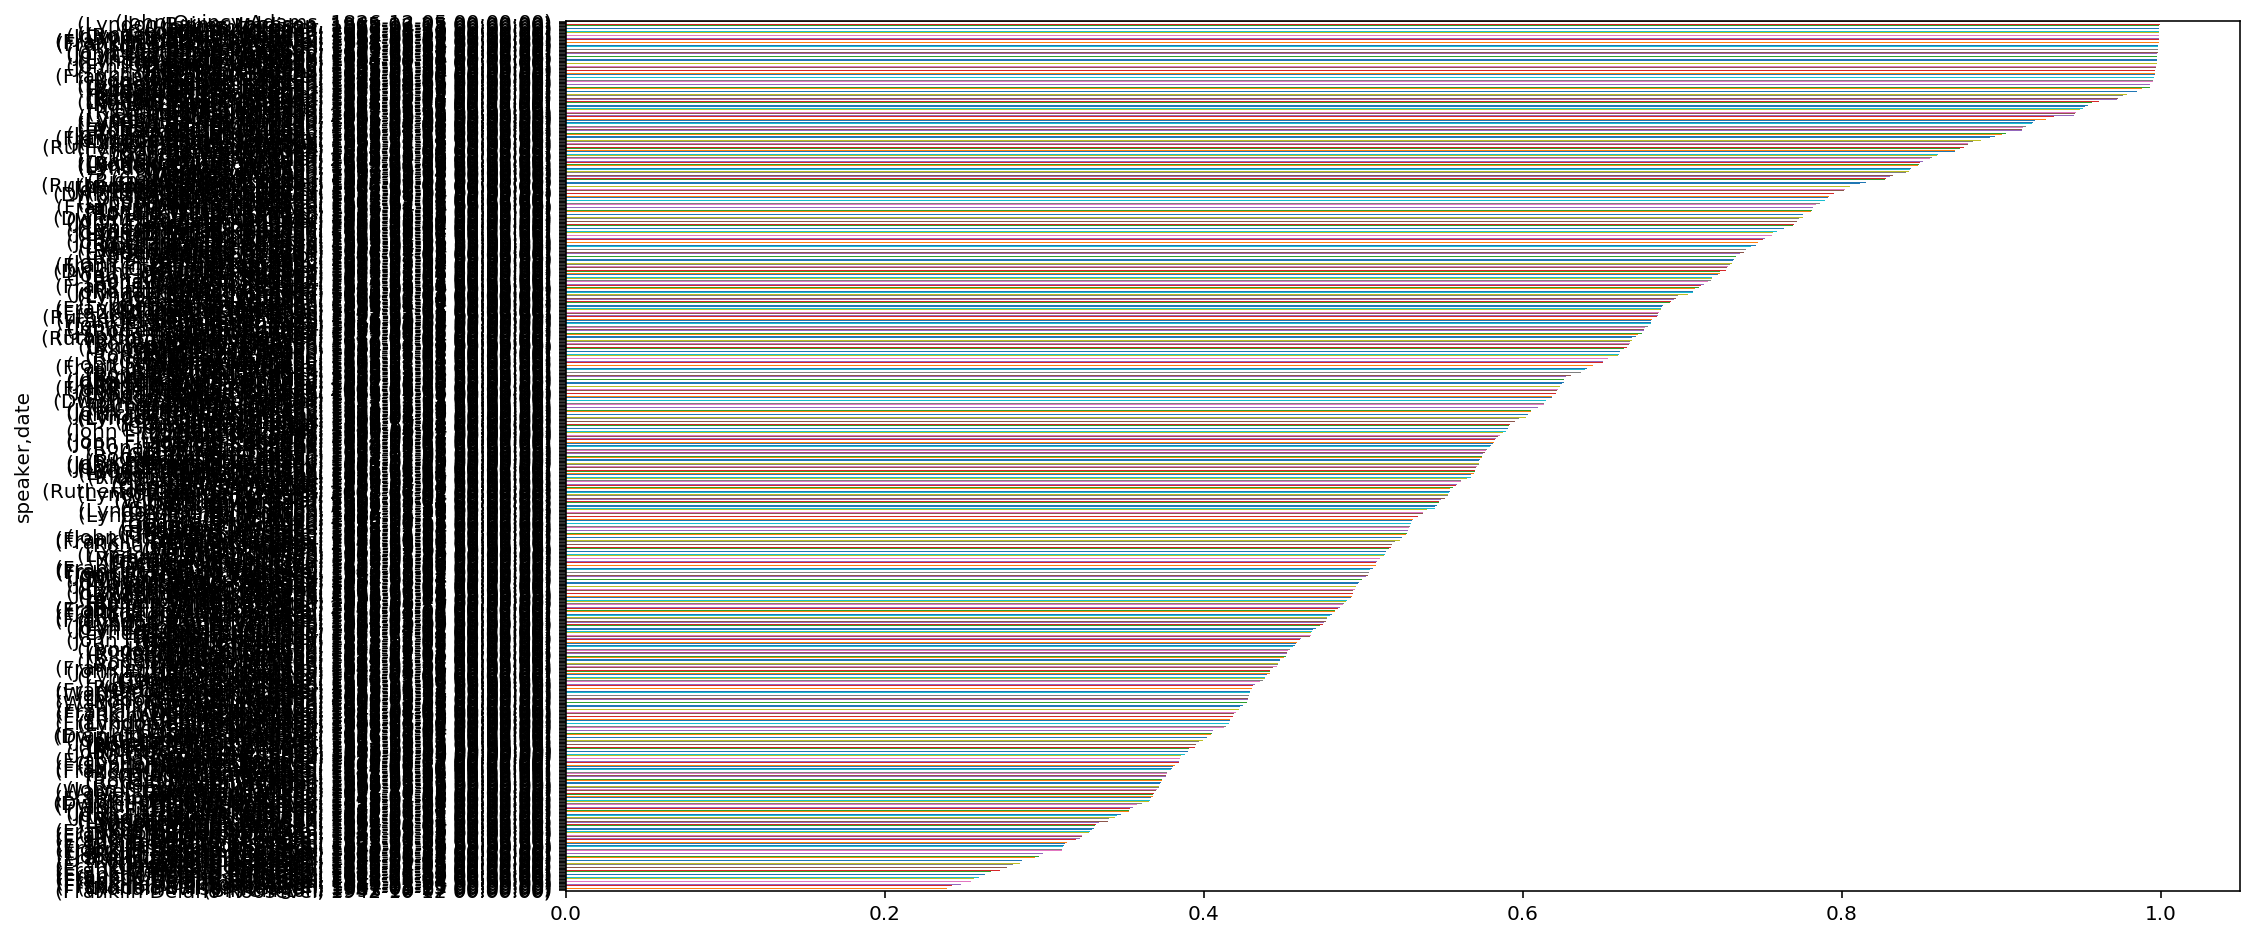

In [96]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)
pd.DataFrame(pipe.transform(speeches.text), index=speeches.index).max(1).sort_values().plot.barh();

# Task C
In terms of topics addressed “heavily” in a speech, which 3 former presidents does President Trump share the highest similarity with? How did you arrive at your conclusion?

# Task D
In terms of his own speeches, do you see President Trump shifting the emphasis on certain topics over time? Explain your response.

# Task E
If you do a K-means clustering with the same number of clusters as topics, do you see President Trump’s speeches and those of the 3 former presidents you identified in Task C in the same cluster? What was the basis of clustering (e.g., tf-idf, cosine similarity, etc.). Discuss your findings.

# Task F
Provide a visualization of both clusters (with colors) and cosine scores using MDS. 